### Load the Dataset

In [2]:
import pandas as pd

# Load dataset, skipping initial metadata rows
file_path = "Household spending by household income quintile 2.csv"
df = pd.read_csv(file_path, skiprows=1)

# Display first few rows to check the new structure
df.head(10)

,Geography,Statistic,Lowest quintile,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Second quintile,Unnamed: 8,Unnamed: 9,...,Fourth quintile,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Highest quintile,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Newfoundland and Labrador,"Household expenditures, summary-level categories",2017,2018,2019,2020,2021,2017,2018,2019,...,2017,2018,2019,2020,2021,2017,2018,2019,2020,2021
1,Newfoundland and Labrador,Total expenditure,"26,869",..,"28,590",..,"34,166","44,208",..,"46,828",...,"99,979",..,"99,461",..,"98,139","163,431",..,"162,002",..,"169,060"
2,Newfoundland and Labrador,Food expenditures,"4,067",..,"5,158",..,"7,409","6,373",..,"7,618",...,"10,032",..,"10,812",..,"14,001","12,050",..,"14,001",..,"18,121"
3,Newfoundland and Labrador,Shelter,"7,483",..,"7,962",..,"8,245","9,791",..,"9,741",...,"17,238",..,"17,826",..,"16,743","24,934",..,"24,162",..,"23,829"
4,Newfoundland and Labrador,Household operations,"2,286",..,"2,587",..,"3,593","3,278",..,"3,428",...,"5,705",..,"6,571",..,"6,540","8,228",..,"7,776",..,"9,786"
5,Newfoundland and Labrador,Household furnishings and equipment,684,..,555,..,"1,412","1,500",..,"1,315",...,"2,677",..,"2,825",..,"4,162","3,744",..,"3,397",..,"6,225"
6,Newfoundland and Labrador,Clothing and accessories,"1,160",..,"1,122",..,618,"2,044",..,"1,932",...,"3,849",..,"3,509",..,"2,457","6,202",..,"5,300",..,"3,871"
7,Newfoundland and Labrador,Private transportation,"4,987",..,"3,990",..,"4,928","8,793",..,"8,052",...,"17,608",..,"14,400",..,"12,741","20,013",..,"17,444",..,"16,247"
8,Newfoundland and Labrador,Public transportation,342,..,464,..,153,554,..,542,...,"1,084",..,"1,377",..,647,"2,285",..,"2,509",..,997
9,Newfoundland and Labrador,Health care,"1,090",..,"1,009",..,"1,461","1,814",..,"1,733",...,"2,832",..,"3,152",..,"2,576","4,032",..,"3,645",..,"3,416"


### Correct Column Headers

In [3]:
# Reload dataset and set correct header row
df.columns = df.iloc[0]  # Use the first row as column names
df = df[1:].reset_index(drop=True)  # Remove the first row from the dataset

# Display updated columns
print(df.columns)
df.head()

Index(['Newfoundland and Labrador',
       'Household expenditures, summary-level categories', '2017', '2018',
       '2019', '2020', '2021', '2017', '2018', '2019', '2020', '2021', '2017',
       '2018', '2019', '2020', '2021', '2017', '2018', '2019', '2020', '2021',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name=0)


,Newfoundland and Labrador,"Household expenditures, summary-level categories",2017,2018,2019,2020,2021,2017,2018,2019,...,2017,2018,2019,2020,2021,2017,2018,2019,2020,2021
0,Newfoundland and Labrador,Total expenditure,"26,869",..,"28,590",..,"34,166","44,208",..,"46,828",...,"99,979",..,"99,461",..,"98,139","163,431",..,"162,002",..,"169,060"
1,Newfoundland and Labrador,Food expenditures,"4,067",..,"5,158",..,"7,409","6,373",..,"7,618",...,"10,032",..,"10,812",..,"14,001","12,050",..,"14,001",..,"18,121"
2,Newfoundland and Labrador,Shelter,"7,483",..,"7,962",..,"8,245","9,791",..,"9,741",...,"17,238",..,"17,826",..,"16,743","24,934",..,"24,162",..,"23,829"
3,Newfoundland and Labrador,Household operations,"2,286",..,"2,587",..,"3,593","3,278",..,"3,428",...,"5,705",..,"6,571",..,"6,540","8,228",..,"7,776",..,"9,786"
4,Newfoundland and Labrador,Household furnishings and equipment,684,..,555,..,"1,412","1,500",..,"1,315",...,"2,677",..,"2,825",..,"4,162","3,744",..,"3,397",..,"6,225"


### Define Correct Column Headers

In [4]:
# Define correct column names manually
new_columns = ["Geography", "Statistic"]  # First two columns remain
quintiles = ["Lowest", "Second", "Third", "Fourth", "Highest"]  # Quintile labels
years = ["2017", "2018", "2019", "2020", "2021"]  # Available years

# Generate new column names for quintile-year combinations
for quintile in quintiles:
    for year in years:
        new_columns.append(f"{quintile}_{year}")

# Apply new column names
df.columns = new_columns

# Display updated dataset
df.head()

,Geography,Statistic,Lowest_2017,Lowest_2018,Lowest_2019,Lowest_2020,Lowest_2021,Second_2017,Second_2018,Second_2019,...,Fourth_2017,Fourth_2018,Fourth_2019,Fourth_2020,Fourth_2021,Highest_2017,Highest_2018,Highest_2019,Highest_2020,Highest_2021
0,Newfoundland and Labrador,Total expenditure,"26,869",..,"28,590",..,"34,166","44,208",..,"46,828",...,"99,979",..,"99,461",..,"98,139","163,431",..,"162,002",..,"169,060"
1,Newfoundland and Labrador,Food expenditures,"4,067",..,"5,158",..,"7,409","6,373",..,"7,618",...,"10,032",..,"10,812",..,"14,001","12,050",..,"14,001",..,"18,121"
2,Newfoundland and Labrador,Shelter,"7,483",..,"7,962",..,"8,245","9,791",..,"9,741",...,"17,238",..,"17,826",..,"16,743","24,934",..,"24,162",..,"23,829"
3,Newfoundland and Labrador,Household operations,"2,286",..,"2,587",..,"3,593","3,278",..,"3,428",...,"5,705",..,"6,571",..,"6,540","8,228",..,"7,776",..,"9,786"
4,Newfoundland and Labrador,Household furnishings and equipment,684,..,555,..,"1,412","1,500",..,"1,315",...,"2,677",..,"2,825",..,"4,162","3,744",..,"3,397",..,"6,225"


### Reshape the Data

In [5]:
# Melt the dataset into long format
df_melted = df.melt(
    id_vars=["Geography", "Statistic"],  # Keep Province and Spending Category
    var_name="Quintile_Year",  # Combines Quintile and Year into one column
    value_name="Expenditure"  # Store spending data here
)

# Extract Year from "Quintile_Year" column
df_melted["Year"] = df_melted["Quintile_Year"].str.extract(r'(\d{4})')

# Extract Income Quintile from "Quintile_Year" column
df_melted["Income Quintile"] = df_melted["Quintile_Year"].str.replace(r'_\d{4}', '', regex=True)

# Drop the old "Quintile_Year" column
df_melted.drop(columns=["Quintile_Year"], inplace=True)

# Display cleaned dataset
df_melted.head()

,Geography,Statistic,Expenditure,Year,Income Quintile
0,Newfoundland and Labrador,Total expenditure,"26,869",2017,Lowest
1,Newfoundland and Labrador,Food expenditures,"4,067",2017,Lowest
2,Newfoundland and Labrador,Shelter,"7,483",2017,Lowest
3,Newfoundland and Labrador,Household operations,"2,286",2017,Lowest
4,Newfoundland and Labrador,Household furnishings and equipment,684,2017,Lowest


### Verify Data Shape

In [6]:
# Check original number of rows and columns
print("Original shape:", df.shape)

# Check new number of rows and columns after melting
print("Melted shape:", df_melted.shape)

Original shape: (170, 27)
Melted shape: (4250, 5)


## Handling and Cleaning of Data

In [7]:
# Check if ".." or "F" still exist in the Expenditure column
print("Checking for '..' and 'F' values in Expenditure:")
print(df_melted["Expenditure"].unique())

Checking for '..' and 'F' values in Expenditure:
['26,869' '4,067' '7,483' ... '304' '235' '3,992']


In [8]:
# Count occurrences of ".." and "F" in Expenditure column
print("Occurrences of '..':", (df_melted["Expenditure"] == "..").sum())
print("Occurrences of 'F':", (df_melted["Expenditure"] == "F").sum())

Occurrences of '..': 1650
Occurrences of 'F': 132


In [9]:
# Convert all Expenditure values to strings before processing
df_melted["Expenditure"] = df_melted["Expenditure"].astype(str)

# Find all unique values that are NOT purely numeric
non_numeric_values = df_melted[~df_melted["Expenditure"].str.replace(",", "").str.isnumeric()]["Expenditure"].unique()
print("Non-numeric values in Expenditure column:", non_numeric_values)

Non-numeric values in Expenditure column: ['F' '..' '705t' 'Ft' '960t' '1,000t' '550t' '555t' '917t' '1,169t' '..t'
 '510t' '843t' '761t' '1,055t' '754t' '1,075t' '1,509t' '880t' '1,034t'
 '963t' '1,038t' '1,403t' '1,570t' '1,108t' '951t' '1,635t' '1,517t'
 '1,729t' '1,526t' '1,234t' '1,871t' '1,527t' '1,825t' '1,218t' '1,581t'
 '2,183t' '3,008t' '1,598t' '2,315t' '1,846t' '1,186t' '3,037t' '2,120t'
 '2,004t' '2,973t' '2,649t' '2,254t']


In [10]:
import numpy as np

# Clean and prepare the Expenditure column efficiently
df_melted["Expenditure"] = (
    df_melted["Expenditure"]
    .astype(str)  # Ensure all values are treated as strings
    .str.replace(r"[t]", "", regex=True)  # Remove "t" characters
    .str.replace(r"[^0-9.,]", "", regex=True)  # Remove non-numeric characters except "." and ","
    .replace(["..", "F", ""], np.nan)  # Replace invalid values with NaN
    .str.replace(",", "", regex=True)  # Remove commas
    .astype(float)  # Convert to float for analysis
)

# Drop rows with missing expenditure & remove "Total Expenditure" rows
df_melted.dropna(subset=["Expenditure"], inplace=True)  # Drop empty expenditure rows
df_melted = df_melted[df_melted["Statistic"] != "Total expenditure"]  # Remove total expenditure rows

# Display final status
print("Final dataset shape after cleaning:", df_melted.shape)
print("Missing values after cleaning:\n", df_melted.isnull().sum())

Final dataset shape after cleaning: (2112, 5)
Missing values after cleaning:
 Geography          0
Statistic          0
Expenditure        0
Year               0
Income Quintile    0
dtype: int64


### Save Cleaned Dataset

In [11]:
cleaned_file_path = "final_household_spending.csv"
df_melted.to_csv(cleaned_file_path, index=False)

print("Final cleaned dataset saved at:", cleaned_file_path)

Final cleaned dataset saved at: final_household_spending.csv


### Summary Statistics

In [12]:
print("📌 Note: The 'Expenditure' column represents the AVERAGE annual expenditure per household.")
print(df_melted.describe())

📌 Note: The 'Expenditure' column represents the AVERAGE annual expenditure per household.
        Expenditure
count   2112.000000
mean    4496.257576
std     5541.345452
min       39.000000
25%     1103.000000
50%     2347.500000
75%     5438.750000
max    38185.000000


## Key Insights and Visulaization

### Spending Trends Over Time

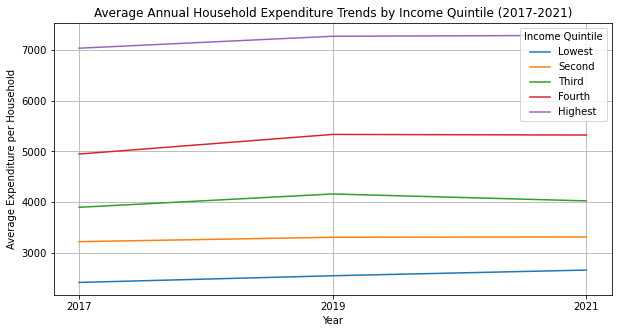

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted, x="Year", y="Expenditure", hue="Income Quintile", ci=None)

plt.title("Average Annual Household Expenditure Trends by Income Quintile (2017-2021)")
plt.xlabel("Year")
plt.ylabel("Average Expenditure per Household")
plt.legend(title="Income Quintile")
plt.grid(True)
plt.show()

### Spending Trends Over Time
- Higher-income households consistently spend more.
- Spending increased slightly from 2017 to 2019 but plateaued or declined post-2020.
- The highest quintile spends over 7,000+ per year, while the lowest quintile spends around 2,500.
- Possible economic impacts (e.g., COVID-19, inflation) influenced spending trends after 2020.

### Spending Distribution by Quintile

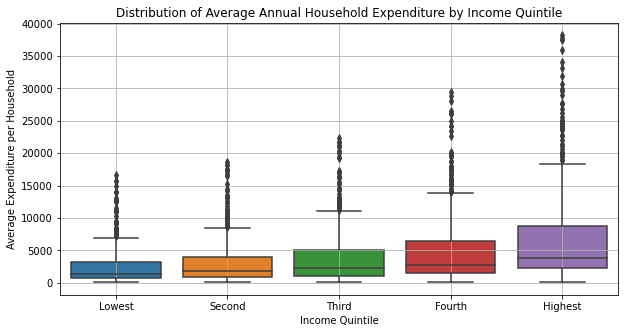

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_melted, x="Income Quintile", y="Expenditure")

plt.title("Distribution of Average Annual Household Expenditure by Income Quintile")
plt.xlabel("Income Quintile")
plt.ylabel("Average Expenditure per Household")
plt.grid(True)
plt.show()

###  Spending Distribution by Quintile
- **Higher income groups show greater variation in spending.**
- **The highest quintile has extreme outliers, indicating some households spend significantly more.**
- **The lowest quintile has the least variation, suggesting tight budget constraints.**
- **Higher income allows for more flexible and diverse spending patterns.**

### Spending by Province

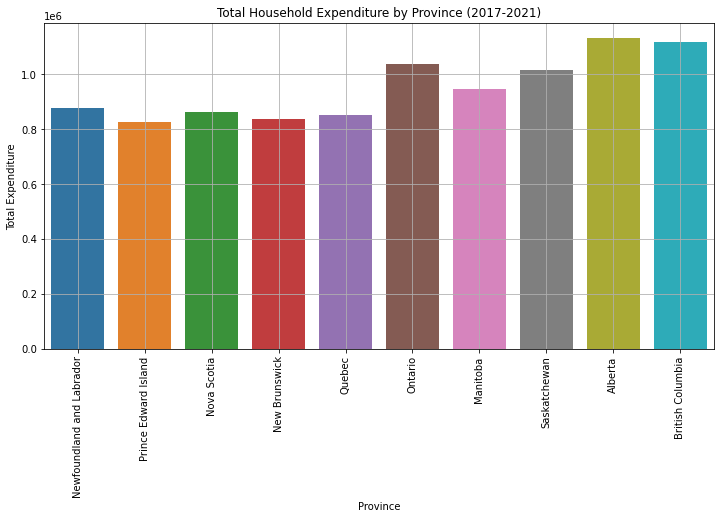

In [15]:
plt.figure(figsize=(12, 6))

# Use SUM instead of AVERAGE for total expenditure by province
sns.barplot(data=df_melted, x="Geography", y="Expenditure", estimator=sum, ci=None)

plt.xticks(rotation=90)
plt.title("Total Household Expenditure by Province (2017-2021)")
plt.xlabel("Province")
plt.ylabel("Total Expenditure")
plt.grid(True)
plt.show()

### Spending by Province
- **Ontario, Alberta, and British Columbia have the highest household expenditures (1M total).**
- **Prince Edward Island and New Brunswick have the **lowest expenditures (800K).**
- **Provincial differences reflect cost of living and economic conditions**.
- **Larger or wealthier provinces naturally have higher total spending levels**.


### Spending by Category

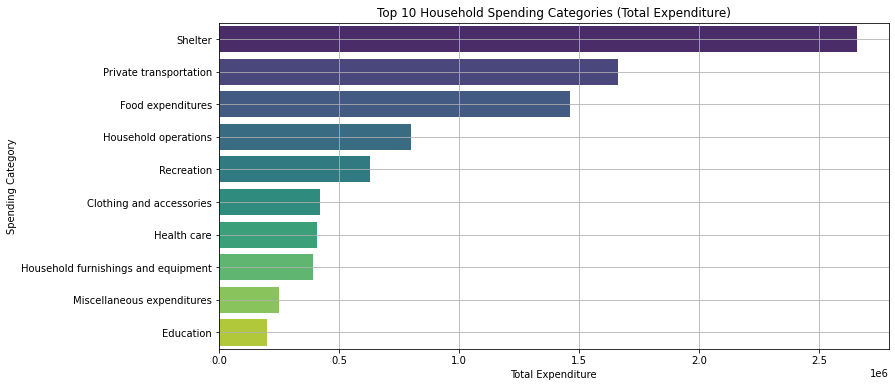

In [16]:
top_categories = df_melted.groupby("Statistic")["Expenditure"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")

plt.title("Top 10 Household Spending Categories (Total Expenditure)")
plt.xlabel("Total Expenditure")
plt.ylabel("Spending Category")
plt.grid(True)
plt.show()

### Spending by Category
- **Shelter is the biggest expense, followed by private transportation and food.**
- **Household operations, recreation, and clothing also contribute significantly.**
- **Education has the lowest spending, possibly due to subsidies or lower household investment.**
- **Basic needs dominate spending, while discretionary spending varies based on income.**